In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airlines = pd.read_csv('airlines.csv')
airports= pd.read_csv('airports.csv')
df = pd.read_csv('flights.csv', low_memory=False)
print (airlines.shape)
print (airports.shape)
print (df.shape)

(14, 2)
(322, 7)
(5819079, 31)


In [3]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# examine how complete the dataset is:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CANCELLATION_REASON,5729195,1.544643
1,WEATHER_DELAY,4755640,18.275040
2,AIRLINE_DELAY,4755640,18.275040
3,SECURITY_DELAY,4755640,18.275040
4,AIR_SYSTEM_DELAY,4755640,18.275040
5,LATE_AIRCRAFT_DELAY,4755640,18.275040
6,ARRIVAL_DELAY,105071,98.194371
7,AIR_TIME,105071,98.194371
8,ELAPSED_TIME,105071,98.194371
9,TAXI_IN,92513,98.410178


# 1.1 Explore the cancelled flights
## Questions:
### Which cancellation reason is the most?
### Which months are mostly affected by weather-related cancellation? 
### Which airports are mostly affected by weather-related cancellation? 

In [5]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])
variables_to_remove = ['YEAR','DAY']
df.drop(variables_to_remove, axis = 1, inplace = True)
df.head()

,MONTH,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [6]:
print (df.CANCELLED.sum())
print (df.CANCELLATION_REASON.notnull().sum())
df_cancelled = df[df.CANCELLATION_REASON.notnull()]
df_cancelled['CANCELLATION_REASON'].value_counts()  

89884
89884


B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

### Any cancelled flight has cancellation reason, and vice versa 

### CANCELLATION_REASON (A = carrier, B = weather, C = NAS, D = security)

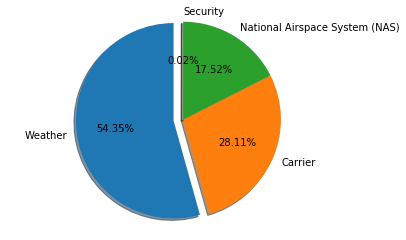

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Weather', 'Carrier', 'National Airspace System (NAS)', 'Security'
sizes = df_cancelled['CANCELLATION_REASON'].value_counts() 
explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'Weather')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [8]:
#df_cancelled.set_index('DATE',inplace=True)
df_cancelled.head()

,MONTH,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
32,1,4,AS,136,N431AS,ANC,SEA,135,NaN,NaN,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,2015-01-01
42,1,4,AA,2459,N3BDAA,PHX,DFW,200,NaN,NaN,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,2015-01-01
68,1,4,OO,5254,N746SK,MAF,IAH,510,NaN,NaN,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,2015-01-01
82,1,4,MQ,2859,N660MQ,SGF,DFW,525,NaN,NaN,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,2015-01-01
90,1,4,OO,5460,N583SW,RDD,SFO,530,NaN,NaN,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [9]:
#df1 = df_cancelled[ df_cancelled['CANCELLATION_REASON']=='B' ].resample('M').count()
#time = df1.index.month
#cancellation = df1.CANCELLATION_REASON.values
#plt.plot(time, cancellation)
#plt.ylabel('cancelled flight')
#plt.xlabel('Month')
#plt.title('Number of cancelled flight due to weather in each month')
#plt.show()

In [10]:
df2 = df_cancelled.filter(['MONTH','CANCELLATION_REASON','ORIGIN_AIRPORT'], axis=1)
df2.head()
#df2.groupby('MONTH').CANCELLATION_REASON.value_counts()

,MONTH,CANCELLATION_REASON,ORIGIN_AIRPORT
32,1,A,ANC
42,1,B,PHX
68,1,B,MAF
82,1,B,SGF
90,1,A,RDD


In [11]:
top20_cancelled = df_cancelled['ORIGIN_AIRPORT'].value_counts().nlargest(20)
top20_cancelled

ORD    8548
DFW    6254
LGA    4531
EWR    3110
BOS    2654
ATL    2557
LAX    2164
SFO    2148
IAH    2130
DEN    2123
DCA    2027
MDW    1959
JFK    1922
BWI    1533
DTW    1270
MCO    1118
CLT    1081
PHL    1074
BNA    1066
LAS     936
Name: ORIGIN_AIRPORT, dtype: int64

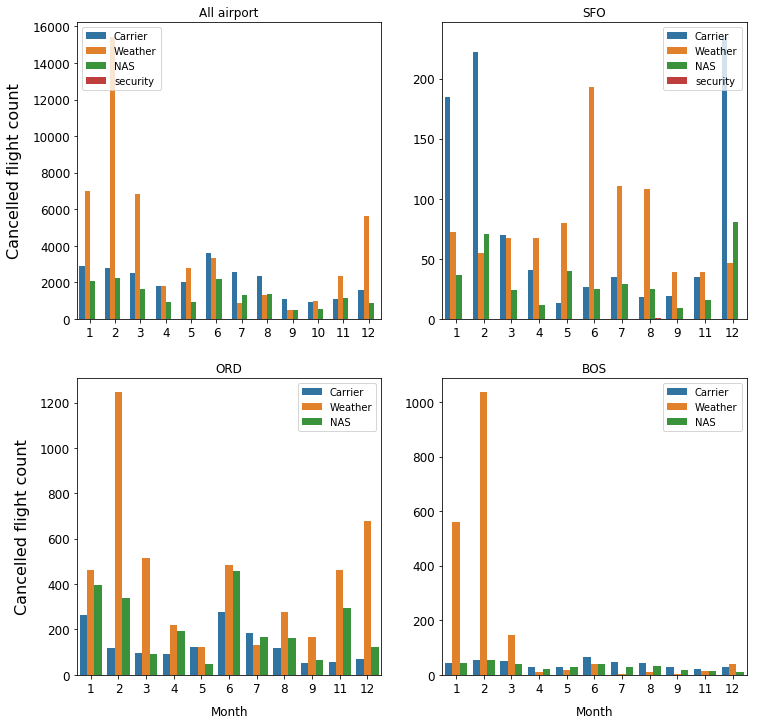

In [12]:
fig = plt.figure(1, figsize=(12,12))

ax = fig.add_subplot(2,2,1)
ax = sns.countplot(x="MONTH", hue='CANCELLATION_REASON', data=df2)

plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, rotation = 0);

plt.xlabel('', fontsize=12, labelpad=10)
plt.ylabel('Cancelled flight count', fontsize=16, labelpad=10)
plt.title('All airport')

#________________
# Set the legend A = carrier, B = weather, C = NAS, D = security
L = plt.legend()
L.get_texts()[0].set_text('Carrier')
L.get_texts()[1].set_text('Weather')
L.get_texts()[2].set_text('NAS')
L.get_texts()[3].set_text('security')


ax = fig.add_subplot(2,2,2)
ax = sns.countplot(x="MONTH", hue='CANCELLATION_REASON', data=df2[ df2['ORIGIN_AIRPORT']=='SFO'] )

plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, rotation = 0);

plt.xlabel('', fontsize=12, labelpad=10)
plt.ylabel('', fontsize=16, labelpad=10)
plt.title('SFO')

#________________
# Set the legend A = carrier, B = weather, C = NAS, D = security
L = plt.legend()
L.get_texts()[0].set_text('Carrier')
L.get_texts()[1].set_text('Weather')
L.get_texts()[2].set_text('NAS')
L.get_texts()[3].set_text('security')

ax = fig.add_subplot(2,2,3)
ax = sns.countplot(x="MONTH", hue='CANCELLATION_REASON', data=df2[ df2['ORIGIN_AIRPORT']=='ORD'] )

plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, rotation = 0);

plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Cancelled flight count', fontsize=16, labelpad=10)
plt.title('ORD')

#________________
# Set the legend A = carrier, B = weather, C = NAS, D = security
L = plt.legend()
L.get_texts()[0].set_text('Carrier')
L.get_texts()[1].set_text('Weather')
L.get_texts()[2].set_text('NAS')
#L.get_texts()[3].set_text('security')

ax = fig.add_subplot(2,2,4)
ax = sns.countplot(x="MONTH", hue='CANCELLATION_REASON', data=df2[ df2['ORIGIN_AIRPORT']=='BOS'] )

plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, rotation = 0);

plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('', fontsize=16, labelpad=10)
plt.title('BOS')

#________________
# Set the legend A = carrier, B = weather, C = NAS, D = security
L = plt.legend()
L.get_texts()[0].set_text('Carrier')
L.get_texts()[1].set_text('Weather')
L.get_texts()[2].set_text('NAS')
#L.get_texts()[3].set_text('security')

plt.show()

### In general, weather related cancellation accounts for most of the cancelled flight in winter months (Dec, Jan, Feb, Mar). Others factors (Carrier, NAS and security) don't show such strong seasonality. 

### However, the result also depends on the locations of the airport. For example, for SFO airport, weather-related cancelled flights is about twice as many in summers month than that winter months.  For BOS and ORD airport, the weater related cancelled flights are dominated in winter months. 

### So in this proposed project, we will take these three airport locations as examples, and futhure exmine the relationship between weather condition and flight cancellation (and delay). And how to make predictions based on forecast weather. 

# 1.2 Explore the delayed flights

In [13]:
print (df['ARRIVAL_DELAY'][df['ARRIVAL_DELAY'] >= 15].count())
print (df.AIR_SYSTEM_DELAY.notnull().sum())

1063439
1063439


### Any arrival delay >=15 mins have a detailed breakdown different causes. 

In [14]:
delay_column = ['ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
                'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_subset = df[delay_column][df['ARRIVAL_DELAY'] >=15].sum()
print(df_subset)
print(df_subset[0])
print(df_subset[1:].sum())

ARRIVAL_DELAY          62651867.0
AIR_SYSTEM_DELAY       14335762.0
SECURITY_DELAY            80985.0
AIRLINE_DELAY          20172956.0
LATE_AIRCRAFT_DELAY    24961931.0
WEATHER_DELAY           3100233.0
dtype: float64
62651867.0
62651867.0


### Arrival Delay is the sum of AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY and WEATHER_DELAY

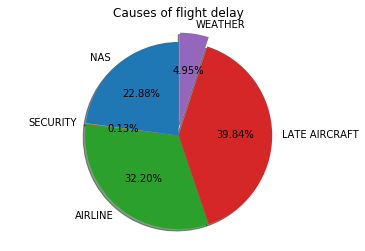

In [15]:
labels = 'NAS', 'SECURITY', 'AIRLINE', 'LATE AIRCRAFT', 'WEATHER'
sizes = df_subset[1:]
explode = (0, 0, 0, 0, 0.1)  # only "explode" the 1st slice (i.e. 'Weather')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Causes of flight delay')
plt.show()

### We need to be aware that some of the late aircraft delay is also caused by weather. 
### Also, we need to be aware that there is another category of weather within the NAS category. This type of weather slows the operations of the system but does not prevent flying. Delays or cancellations coded "NAS" are the type of weather delays that could be reduced with corrective action by the airports or the Federal Aviation Administration.  

In [16]:
#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in df:
    df.loc[df['ARRIVAL_DELAY'] <= 15, 'STATUS'] = 0
    df.loc[df['ARRIVAL_DELAY'] >= 15, 'STATUS'] = 1
    df.loc[df['ARRIVAL_DELAY'] >= 60, 'STATUS'] = 2
    df.loc[df['CANCELLED'] == 1, 'STATUS'] = 3
    df.loc[df['DIVERTED'] == 1, 'STATUS'] = 4

In [17]:
#df.head()
variables_to_remove = ['DIVERTED','CANCELLED']
df.drop(variables_to_remove, axis = 1, inplace = True)
df.shape

(5819079, 29)

In [18]:
airlines
# put the content of this dataframe in a dictionary
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
abbr_companies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

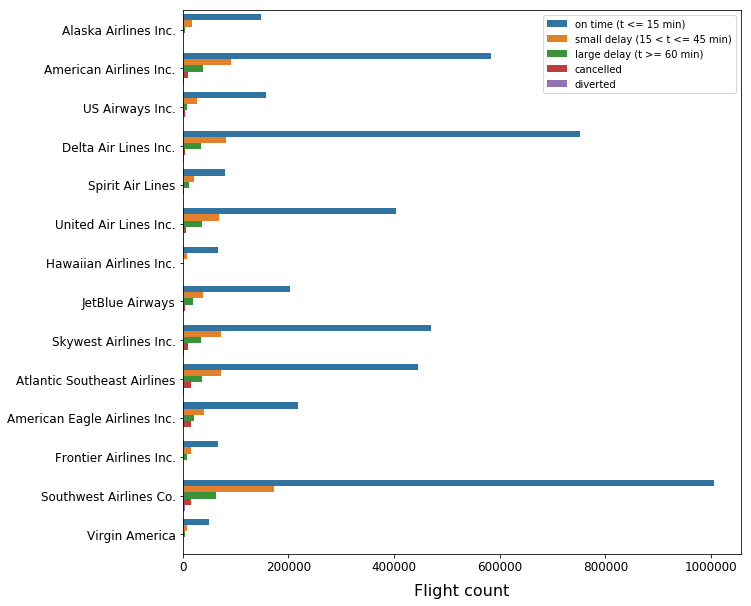

In [19]:
fig = plt.figure(1, figsize=(10,10))
ax = sns.countplot(y="AIRLINE", hue='STATUS', data=df)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'normal', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t <= 15 min)')
L.get_texts()[1].set_text('small delay (15 < t <= 45 min)')
L.get_texts()[2].set_text('large delay (t >= 60 min)')
L.get_texts()[3].set_text('cancelled')                         
L.get_texts()[4].set_text('diverted')
plt.show()

In [20]:
#df['ARRIVAL_DELAY'].groupby('DAY_OF_WEEK').mean()

In [21]:
top20_delayed = df['ORIGIN_AIRPORT'][df['ARRIVAL_DELAY'] >= 15].value_counts().nlargest(20)
top20_delayed

ORD    66663
ATL    56462
DFW    50478
DEN    43331
LAX    40281
IAH    30690
SFO    29534
PHX    27427
LAS    27225
LGA    22709
MCO    22349
BOS    21363
EWR    21163
CLT    20623
JFK    20260
BWI    19049
DTW    18956
SEA    18554
MSP    18171
MDW    17273
Name: ORIGIN_AIRPORT, dtype: int64

In [22]:
top20_weather_delayed = df['ORIGIN_AIRPORT'][df['WEATHER_DELAY'] >= 15].value_counts().nlargest(20)
top20_weather_delayed

ORD    6602
ATL    4411
DFW    3811
DEN    1764
MCO    1630
JFK    1302
IAH    1283
MIA     983
BOS     921
MDW     855
EWR     779
LGA     777
DAL     753
BWI     715
TPA     711
CLT     683
DCA     663
DTW     619
LAX     562
MSP     555
Name: ORIGIN_AIRPORT, dtype: int64

In [23]:
df.set_index('DATE',inplace=True)

Text(0.5, 1.0, 'Arrival delay (total mins)')

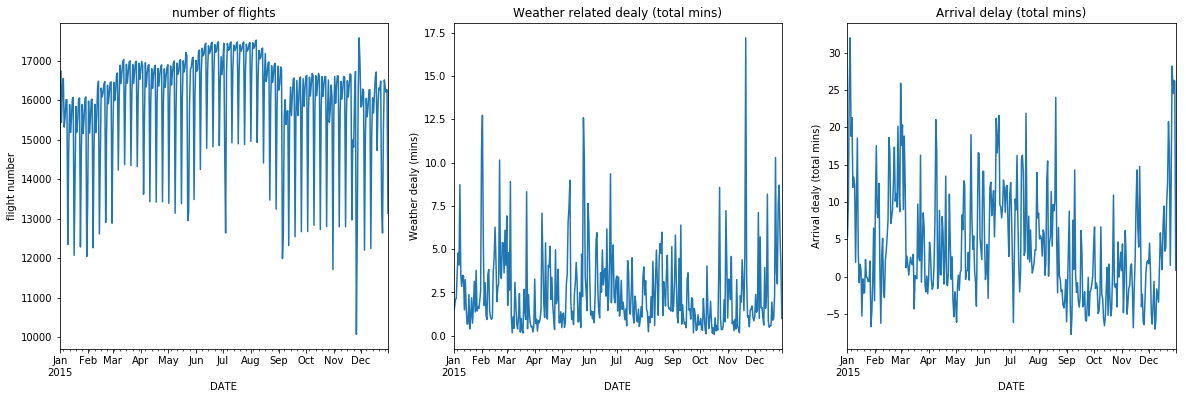

In [24]:
fig = plt.figure(1, figsize=(20,6))
plt.subplot(1, 3, 1) 
df['FLIGHT_NUMBER'].resample('D').count().plot()
plt.ylabel('flight number')
plt.title('number of flights')

plt.subplot(1, 3, 2) 
df['WEATHER_DELAY'].resample('D').mean().plot()
plt.ylabel('Weather dealy (mins)')
plt.title('Weather related dealy (total mins)')

plt.subplot(1, 3, 3) 
df['ARRIVAL_DELAY'].resample('D').mean().plot()
plt.ylabel('Arrival dealy (total mins)')
plt.title('Arrival delay (total mins)')

Text(0.5, 1.0, 'Arrival delay (total mins)')

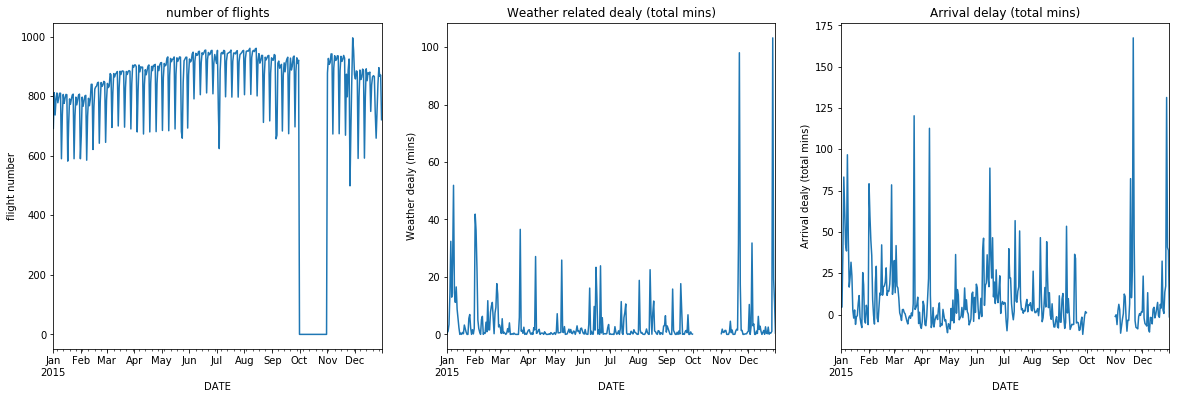

In [25]:
fig = plt.figure(1, figsize=(20,6))
plt.subplot(1, 3, 1) 
df['FLIGHT_NUMBER'][df['ORIGIN_AIRPORT']=='ORD'].resample('D').count().plot()
plt.ylabel('flight number')
plt.title('number of flights')

plt.subplot(1, 3, 2) 
df['WEATHER_DELAY'][df['ORIGIN_AIRPORT']=='ORD'].resample('D').mean().plot()
plt.ylabel('Weather dealy (mins)')
plt.title('Weather related dealy (total mins)')

plt.subplot(1, 3, 3) 
df['ARRIVAL_DELAY'][df['ORIGIN_AIRPORT']=='ORD'].resample('D').mean().plot()
plt.ylabel('Arrival dealy (total mins)')
plt.title('Arrival delay (total mins)')

Text(0.5, 1.0, 'Arrival delay (total mins)')

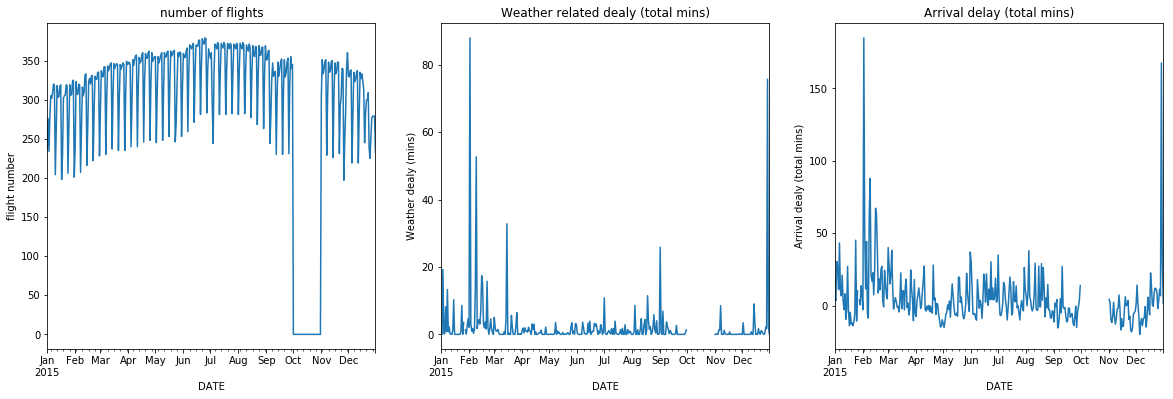

In [26]:
fig = plt.figure(1, figsize=(20,6))
plt.subplot(1, 3, 1) 
df['FLIGHT_NUMBER'][df['ORIGIN_AIRPORT']=='BOS'].resample('D').count().plot()
plt.ylabel('flight number')
plt.title('number of flights')

plt.subplot(1, 3, 2) 
df['WEATHER_DELAY'][df['ORIGIN_AIRPORT']=='BOS'].resample('D').mean().plot()
plt.ylabel('Weather dealy (mins)')
plt.title('Weather related dealy (total mins)')

plt.subplot(1, 3, 3) 
df['ARRIVAL_DELAY'][df['ORIGIN_AIRPORT']=='BOS'].resample('D').mean().plot()
plt.ylabel('Arrival dealy (total mins)')
plt.title('Arrival delay (total mins)')

Text(0.5, 1.0, 'Arrival delay (total mins)')

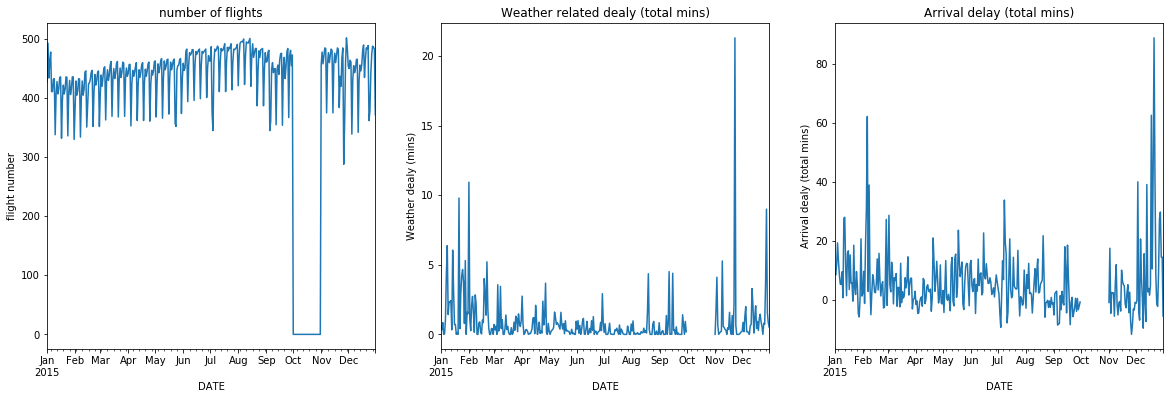

In [27]:
fig = plt.figure(1, figsize=(20,6))
plt.subplot(1, 3, 1) 
df['FLIGHT_NUMBER'][df['ORIGIN_AIRPORT']=='SFO'].resample('D').count().plot()
plt.ylabel('flight number')
plt.title('number of flights')

plt.subplot(1, 3, 2) 
df['WEATHER_DELAY'][df['ORIGIN_AIRPORT']=='SFO'].resample('D').mean().plot()
plt.ylabel('Weather dealy (mins)')
plt.title('Weather related dealy (total mins)')

plt.subplot(1, 3, 3) 
df['ARRIVAL_DELAY'][df['ORIGIN_AIRPORT']=='SFO'].resample('D').mean().plot()
plt.ylabel('Arrival dealy (total mins)')
plt.title('Arrival delay (total mins)')

In [28]:
df_oct = df.loc['2015-09-01':'2015-09-30']

In [29]:
df.ORIGIN_AIRPORT.value_counts()

ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
SFO      148008
PHX      146815
IAH      146622
LAS      133181
MSP      112117
MCO      110982
SEA      110899
DTW      108500
BOS      107847
EWR      101772
CLT      100324
LGA       99605
SLC       97210
JFK       93811
BWI       86079
MDW       80886
DCA       73794
FLL       73624
SAN       70207
MIA       69341
PHL       66021
TPA       63906
DAL       59699
HOU       52042
BNA       47580
          ...  
11617        55
12255        53
11587        53
12343        53
14109        53
11525        53
10739        53
12888        53
12177        53
13127        53
10918        53
10333        53
11447        49
13964        36
ITH          34
11097        31
12016        31
10170        31
10154        28
10581        27
13459        26
12265        22
12094        20
15497        14
14025        13
13541        11
14222         9
10165         9
13502         6
11503         4
Name: ORIGIN_AIRPORT, Le

In [30]:
df.ORIGIN_AIRPORT.unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

### Note that the airport names are sometimes listed as interger number, as opposed to the three letter code. This is weird. Most of these cases are in Oct. 